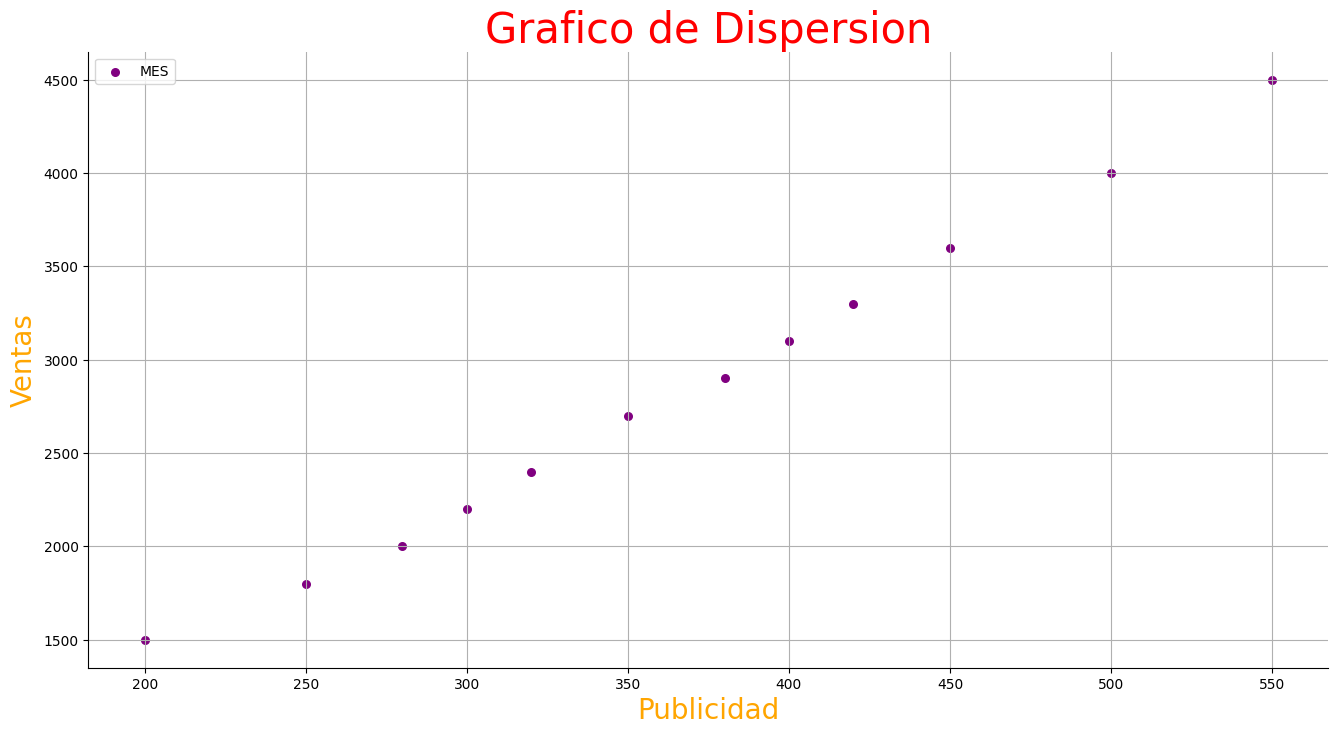

coef.corr= PearsonRResult(statistic=np.float64(0.9982009028915801), pvalue=np.float64(1.4798609619076058e-13))
parametros:  const        -388.951522
Publicidad      8.788050
dtype: float64
parámetros: const        -388.951522
Publicidad      8.788050
dtype: float64


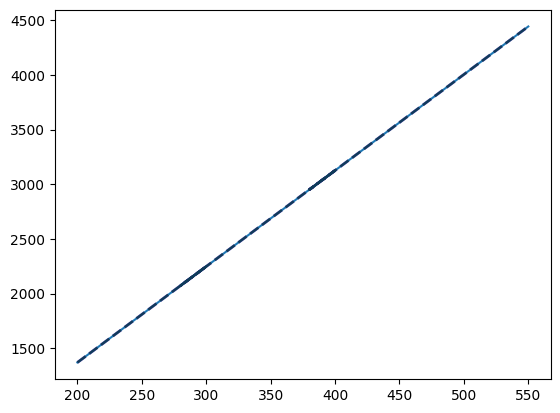


coeficiente de determinación= 0.9964

intervalo_de_confianza:                      0           1
const      -530.236776 -247.666268
Publicidad    8.416117    9.159982


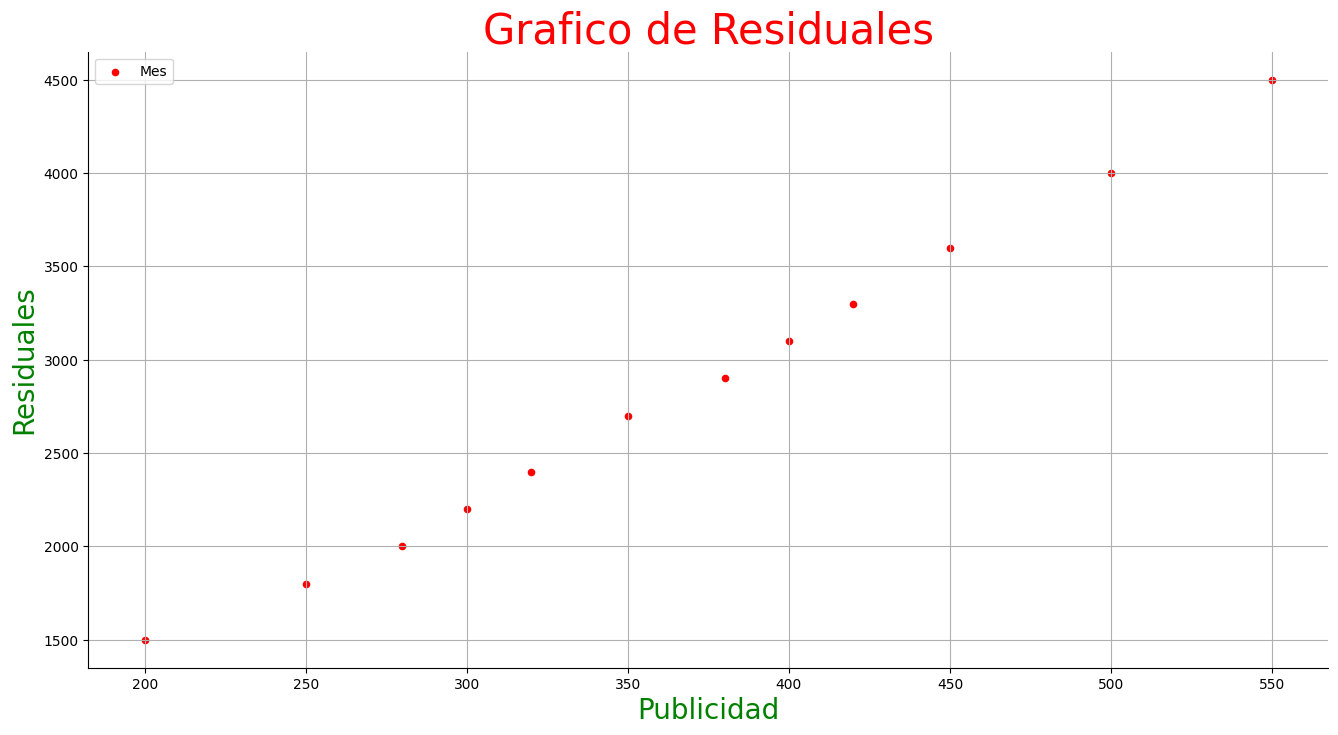

valor-p(shapiro)=  0.2681070064120484
valor_p de Breusch-Pagan:  0.0803

x=70, [226.21195039]
x=75, [270.15219842]
x=84, [349.24464487]


,df,sum_sq,mean_sq,F,PR(>F)
Ventas,1.0,117841.503030,117841.503030,2771.674079,1.479861e-13
Residual,10.0,425.163636,42.516364,NaN,NaN


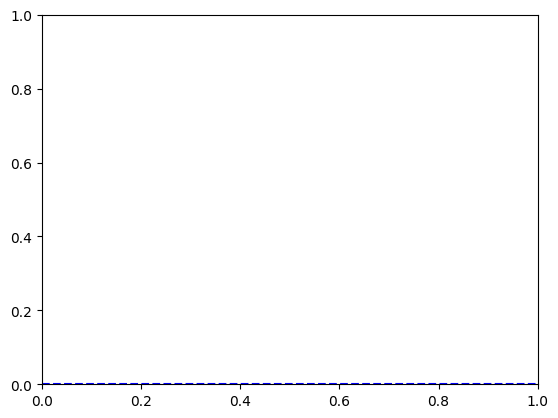

In [ ]:
import pandas as pd
df = pd.DataFrame({
    "Publicidad":[200, 250, 300, 280, 320, 350, 400, 380, 420, 450, 500, 550],
    "Ventas":[1500, 1800, 2200, 2000, 2400, 2700, 3100, 2900, 3300, 3600,4000, 4500]
})

# inciso a) Establesca una variable dependiente ( Y ) y una variable independiente ( X )
x= df["Publicidad"]
y= df["Ventas"]

# inciso b) Realice un diagrama de dispersión para estos datos.
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8) ,dpi = 100)

plt.scatter(x,y, label = "MES", color = "purple", s=30)
plt.xlabel("Publicidad", fontsize=20, color = "orange")
plt.ylabel("Ventas", fontsize=20, color = "orange")
plt.title("Grafico de Dispersion", fontsize=30, color = "red")
plt.gca().spines[["top", "right"]]. set_visible(False)
plt.grid()
plt.legend()

plt.show()

# inciso c) ¿Los datos soportan la suposición de linealidad?
from scipy.stats import pearsonr
r=pearsonr(x,y)
print("coef.corr=", pearsonr(x,y))
#print("coeficiente de determinacion=", r**2)
#r2 = r**2
#print("coeficiente de determinacion", r2)

# inciso d) Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score
#comentario= "r2= r2_score(y, yc))"

#inciso e) Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()
print("parametros: ", modelo.params)
yc = modelo.predict(x_constante)
plt.plot(x,yc, color="blue",linestyle="--", linewidth=2, alpha=0.5)
plt.plot(x, yc)


#inciso f) Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de dispersión.
import statsmodels.api as sm
x_constante=sm.add_constant(x)
x
x_constante
modelo=sm.OLS(y,x_constante).fit()
modelo.params
print("parámetros:", modelo.params)
yc=modelo.predict(x_constante)
plt.plot(x,yc, color="black",linestyle="--", linewidth=2, alpha=0.5)
plt.show()

from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print("\ncoeficiente de determinación=",round(r2,4))

#inciso (g) Obtenga un intervalo de confianza del 95% para la pendiente de la recta de regresión ajustada ( b1 )
intervalo_de_confianza=modelo.conf_int(alpha=0.05)
print("\nintervalo_de_confianza:",intervalo_de_confianza)

#inciso (h) Calcule los residuales y trace un nuevo gráfico de dispersión. Comente, ¿Parece que se verifican los supuestos?
residuales=modelo.resid
plt.figure(figsize=(16,8), dpi=100)
plt.scatter(x,y, label="Mes", color="red",s=20)
plt.xlabel("Publicidad", fontsize=20, color = "green")
plt.ylabel("Residuales", fontsize=20, color = "green")
plt.title("Grafico de Residuales", fontsize=30, color = "red")
plt.gca().spines[["top","right"]].set_visible(False)
plt.grid()
plt.legend()
plt.show()

plt.axhline(y=0, color="blue", linestyle="--")
#Test de shapiro
#Ho: Hay normalidad
#H1: No hay normalidad
#Nivel de significancia:0.05

#Test Breusch-pagan
#Ho: No hay heteroscedasticidad
#H1: Hay heteroscedasticidad
#Nivel de significancia:0.05

from scipy.stats import shapiro
estadistico_shapiro, valor_p_shapiro=shapiro(residuales)
print("valor-p(shapiro)= ", valor_p_shapiro)

from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')
modelo.params
print("x=70,", modelo.predict([1, 70]))
print("x=75,", modelo.predict([1, 75]))
print("x=84,", modelo.predict([1, 84]))

from statsmodels.formula.api import ols
modelo_lineal = ols('Publicidad ~ Ventas', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova